In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
us_house_price_df = pd.read_csv("./dataset/prepared_dataset.csv").set_index("DATE")
us_house_price_df.head()

,CSUSHPISA,Year,Month,UNRATE,FedFunds,Per_Capita_GDP,CPI,PopulationGrowthRate
DATE,,,,,,,,
1987-01-01,63.964,1987.0,1.0,6.6,6.43,4722.156,111.4,0.893829
1988-01-01,68.858,1988.0,1.0,5.7,6.83,5073.372,116.0,0.907999
1989-01-01,73.946,1989.0,1.0,5.4,9.12,5511.253,121.2,0.944406
1990-01-01,76.897,1990.0,1.0,5.4,8.23,5872.701,127.5,1.129651
1991-01-01,75.915,1991.0,1.0,6.4,6.91,6035.178,134.7,1.336261


In [3]:
# Dropping year and month columns
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

In [4]:
# Summary statistics
summary_stats = us_house_price_df.describe()
summary_stats

,CSUSHPISA,UNRATE,FedFunds,Per_Capita_GDP,CPI,PopulationGrowthRate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,135.571417,5.769444,3.129444,12783.230722,191.522444,0.910591
std,55.454402,1.511068,2.718450,5654.706062,47.042945,0.274324
min,63.964000,3.500000,0.070000,4722.156000,111.400000,0.156747
25%,81.481250,4.675000,0.297500,7781.923250,153.650000,0.733540
50%,139.064000,5.600000,2.710000,12345.366500,188.950000,0.926641
75%,174.167250,6.600000,5.470000,16785.576250,232.446000,1.134323
max,285.829000,9.800000,9.120000,25029.116000,282.599000,1.386886


In [5]:
# Correlation matrix
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,UNRATE,FedFunds,Per_Capita_GDP,CPI,PopulationGrowthRate
CSUSHPISA,1.000000,-0.250971,-0.673685,0.957521,0.934890,-0.801698
UNRATE,-0.250971,1.000000,-0.313140,-0.160969,-0.095973,0.040410
FedFunds,-0.673685,-0.313140,1.000000,-0.770299,-0.812384,0.620417
Per_Capita_GDP,0.957521,-0.160969,-0.770299,1.000000,0.991344,-0.828332
CPI,0.934890,-0.095973,-0.812384,0.991344,1.000000,-0.790102
PopulationGrowthRate,-0.801698,0.040410,0.620417,-0.828332,-0.790102,1.000000


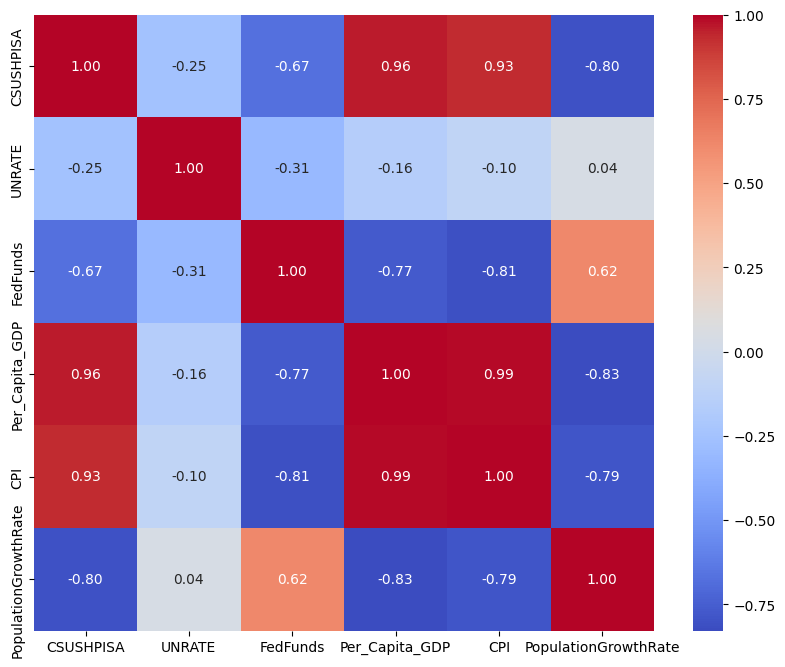

In [6]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

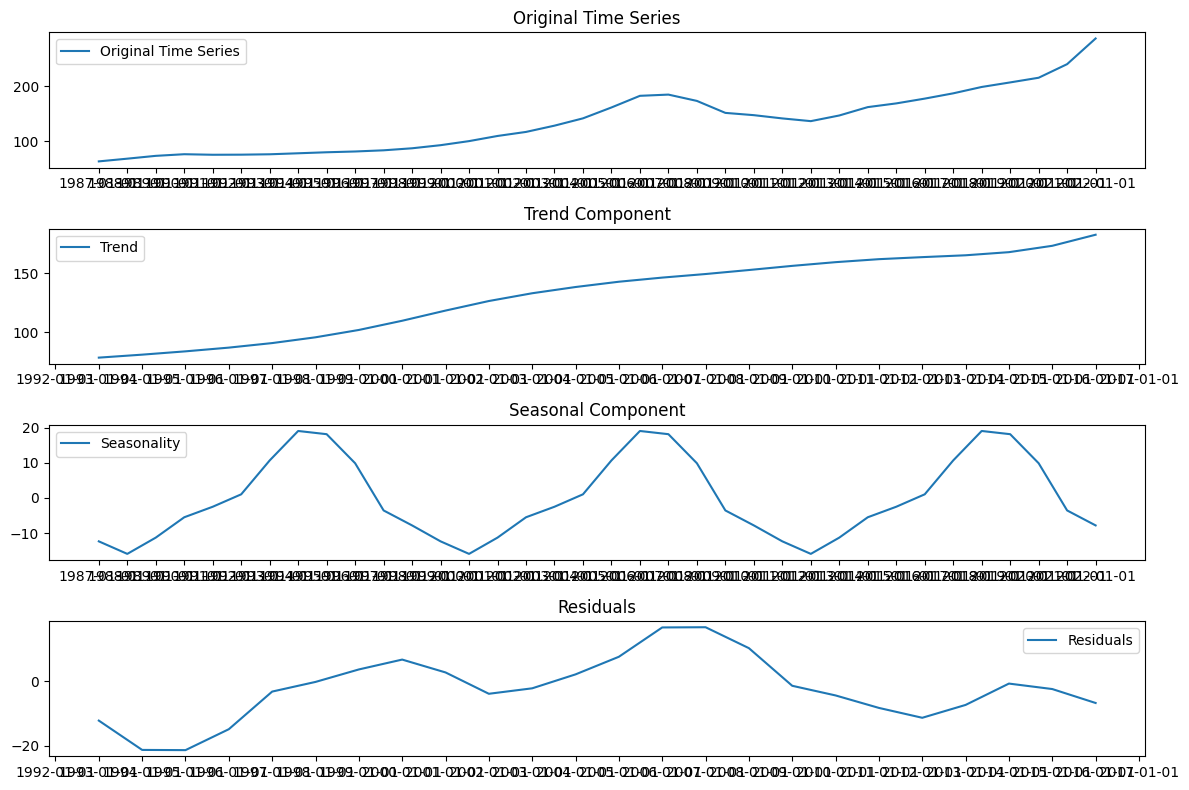

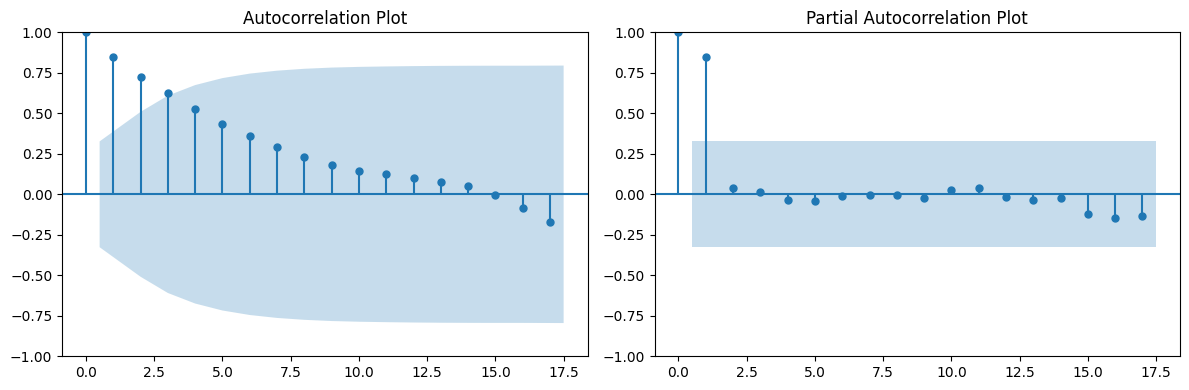

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=17, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=17, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

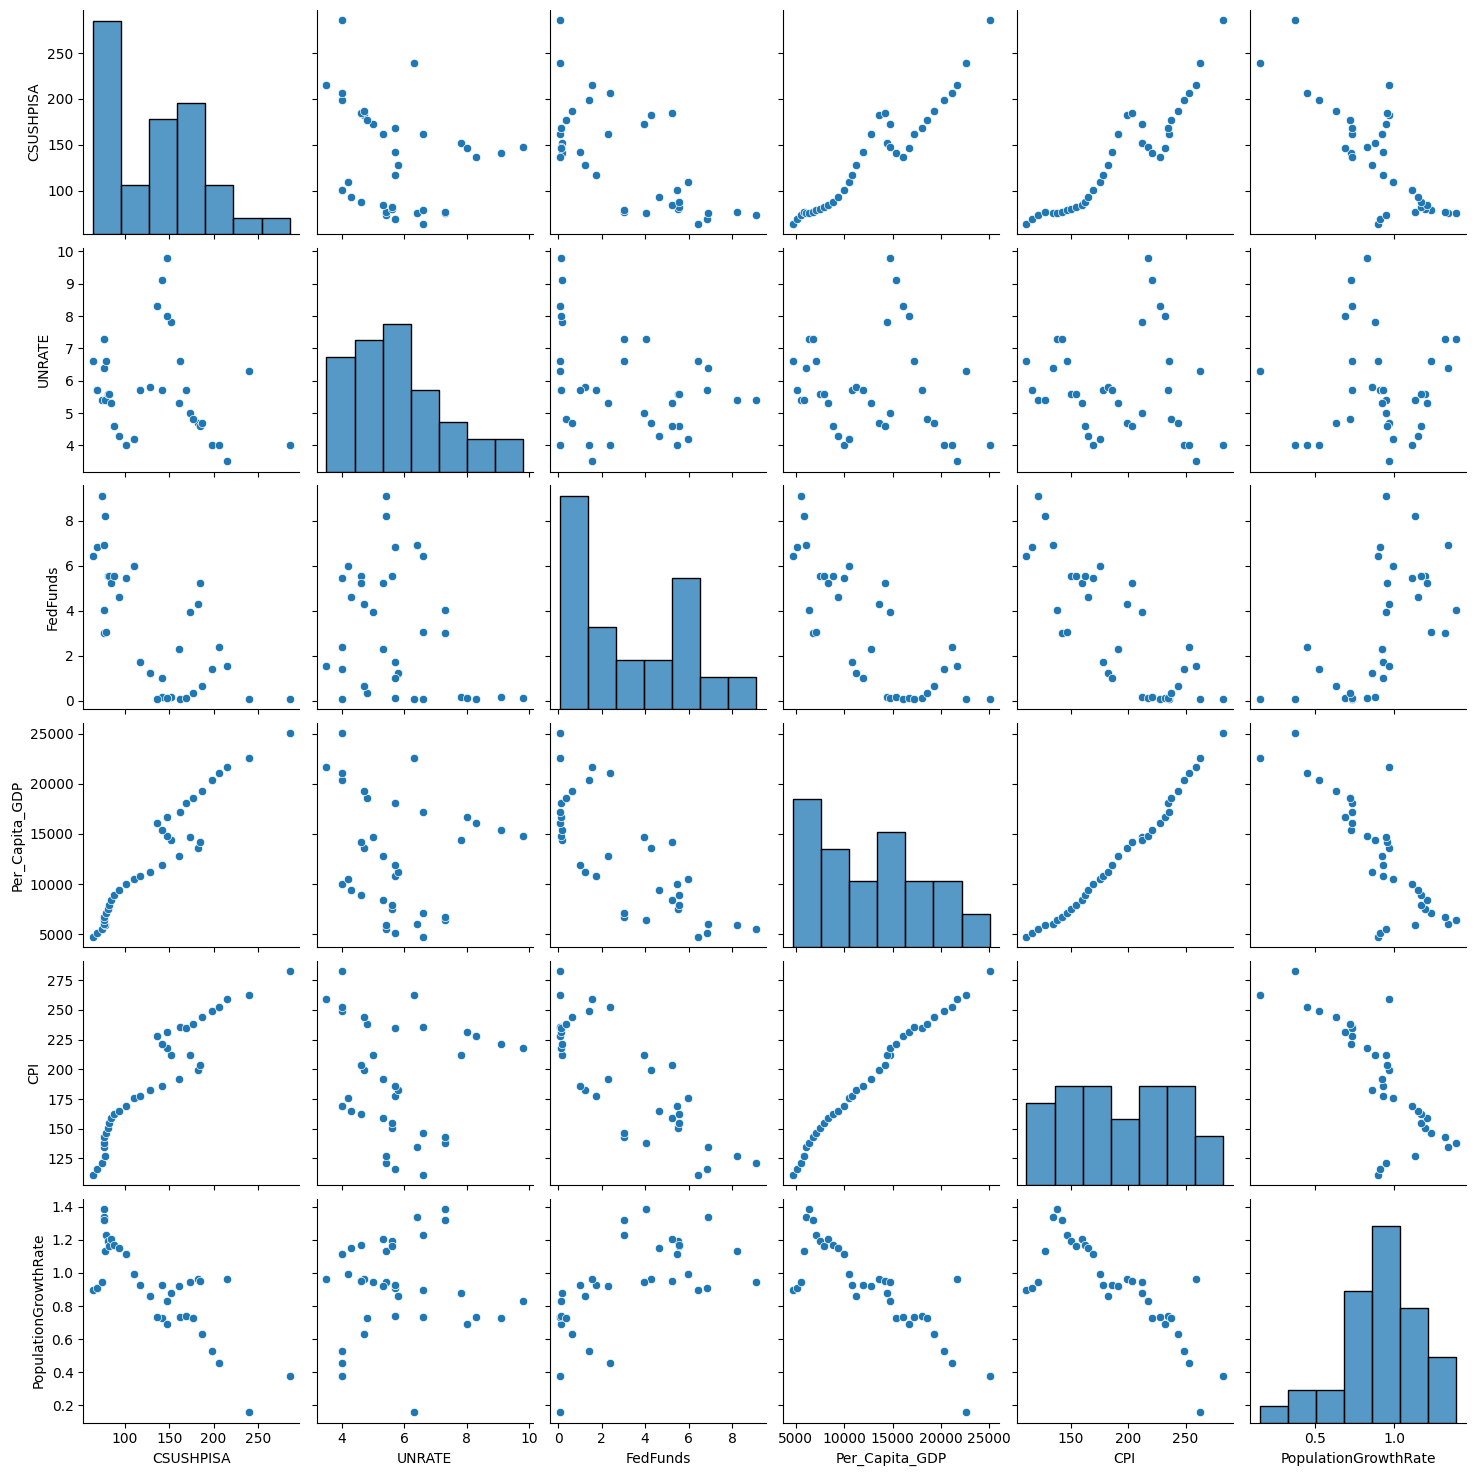

In [10]:
sns.pairplot(us_house_price_df)

In [11]:
us_house_price_df.columns

Index(['CSUSHPISA', 'UNRATE', 'FedFunds', 'Per_Capita_GDP', 'CPI',
       'PopulationGrowthRate'],
      dtype='object')

In [15]:
factors = ['CSUSHPISA', 'UNRATE', 'FedFunds', 'Per_Capita_GDP', 'CPI', 'PopulationGrowthRate']

<Figure size 1300x800 with 0 Axes>

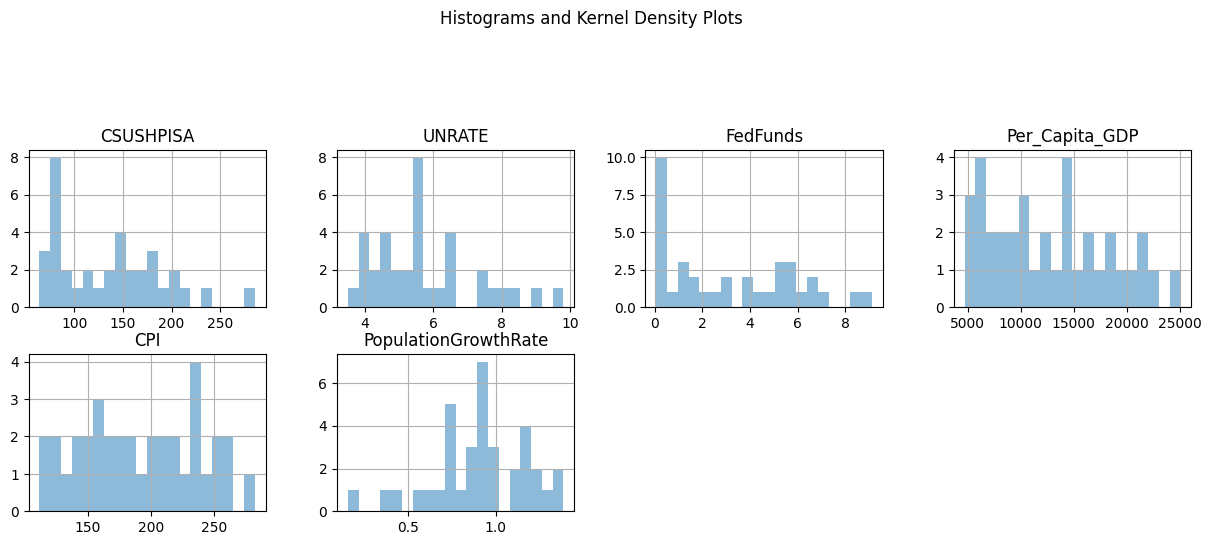

In [16]:
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

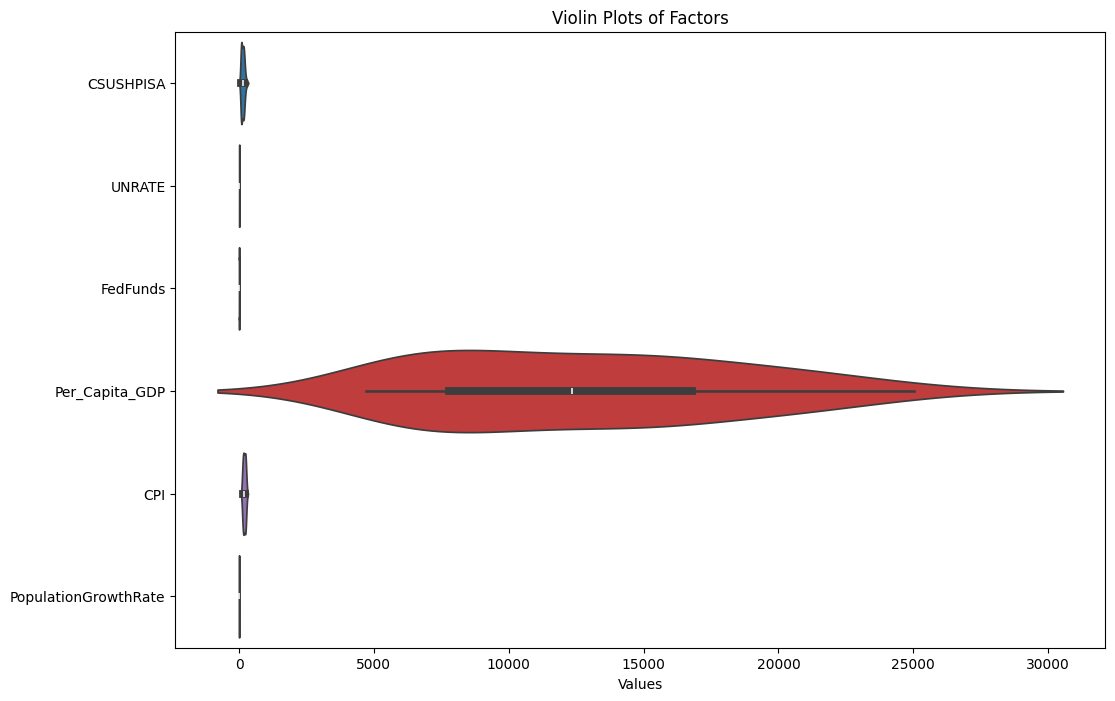

In [17]:
# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=us_house_price_df[factors], orient='h')
plt.title('Violin Plots of Factors')
plt.xlabel('Values')
plt.show()

In [18]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

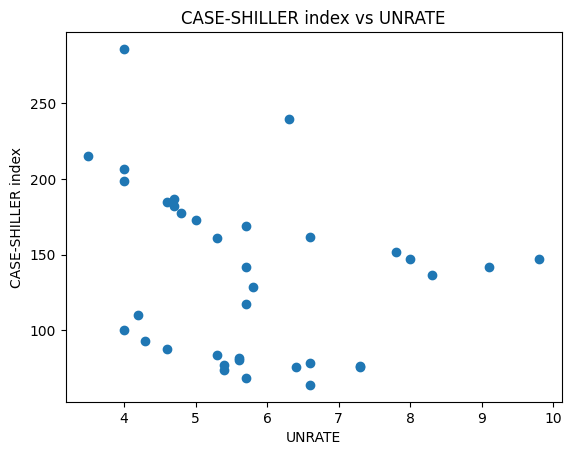

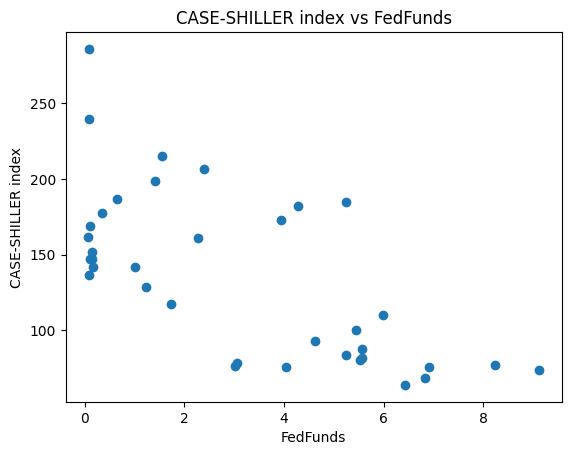

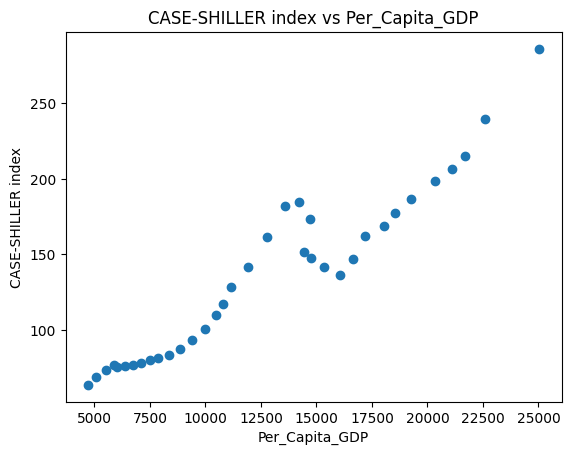

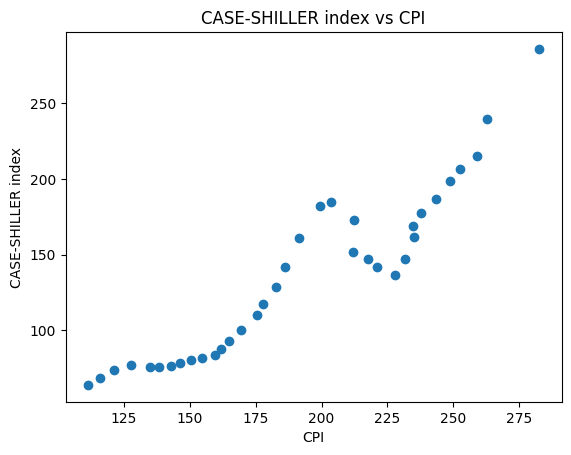

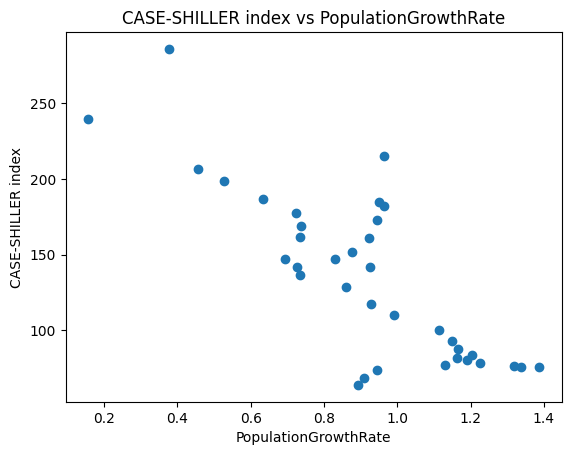

In [19]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

In [22]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
UNRATE                  0.250971
FedFunds                0.673685
PopulationGrowthRate    0.801698
CPI                     0.934890
Per_Capita_GDP          0.957521
dtype: float64


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

In [25]:
mult_cols = ["UNRATE", "FedFunds"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df

In [26]:
X

,Per_Capita_GDP,CPI,PopulationGrowthRate
DATE,,,
1987-01-01,4722.156,111.400,0.893829
1988-01-01,5073.372,116.000,0.907999
1989-01-01,5511.253,121.200,0.944406
1990-01-01,5872.701,127.500,1.129651
1991-01-01,6035.178,134.700,1.336261
1992-01-01,6363.102,138.300,1.386886
1993-01-01,6729.459,142.800,1.318680
1994-01-01,7115.652,146.300,1.226296
1995-01-01,7522.289,150.500,1.190787


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 279.79749180923886
R-squared: 0.9177594798023773
Coefficients:
Per_Capita_GDP: 93.12022449868712
CPI: -42.83788322077985
PopulationGrowthRate: 2.8072396206076373
Intercept: 127.40928571428573

Model: ElasticNet
Mean Squared Error: 702.6281537386947
R-squared: 0.7934774021907173
Coefficients:
Per_Capita_GDP: 17.1293775852441
CPI: 15.706827997375441
PopulationGrowthRate: -8.660703675425227
Intercept: 127.40928571428572

Model: Random Forest
Mean Squared Error: 544.7008379086651
R-squared: 0.8398967768723563
Feature Importance Analysis:
Per_Capita_GDP: 0.5128924462680821
CPI: 0.45235338962504085
PopulationGrowthRate: 0.03475416410687721

Model: Gradient Boosting
Mean Squared Error: 433.3156657160015
R-squared: 0.8726360785872975
Feature Importance Analysis:
Per_Capita_GDP: 0.5870501794745152
CPI: 0.38857999115361785
PopulationGrowthRate: 0.024369829371866998

Model: SVR
Mean Squared Error: 4585.340471550712
R-squared: -0.34776328131148637

Mode

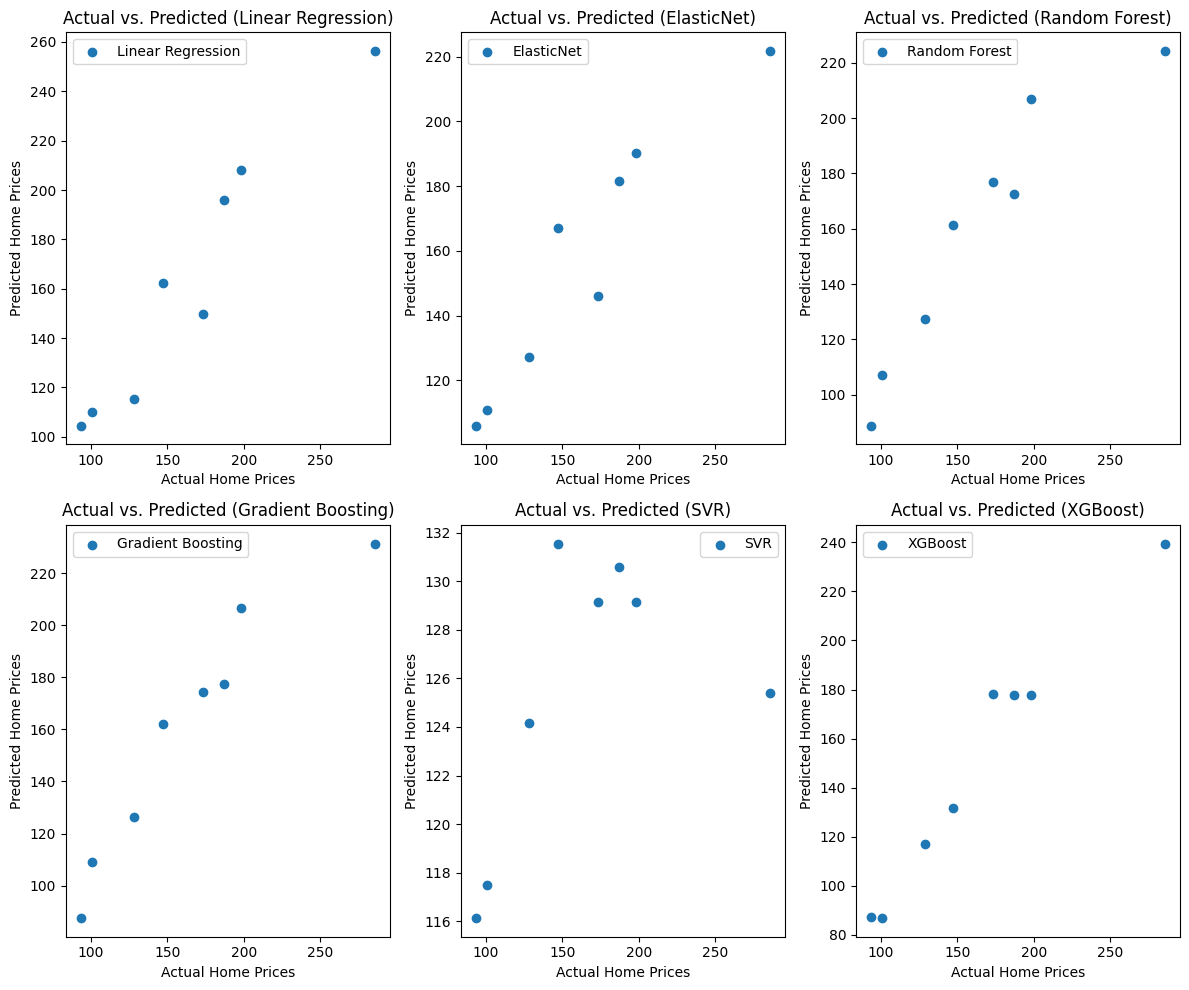


Best Model: LinearRegression with MSE: 279.79749180923886


In [30]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

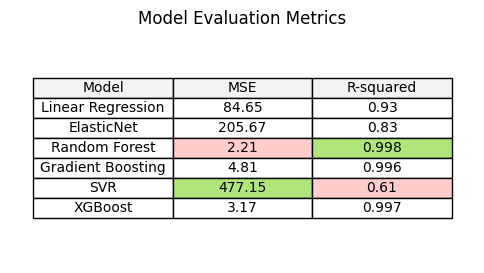

In [31]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R-squared': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()

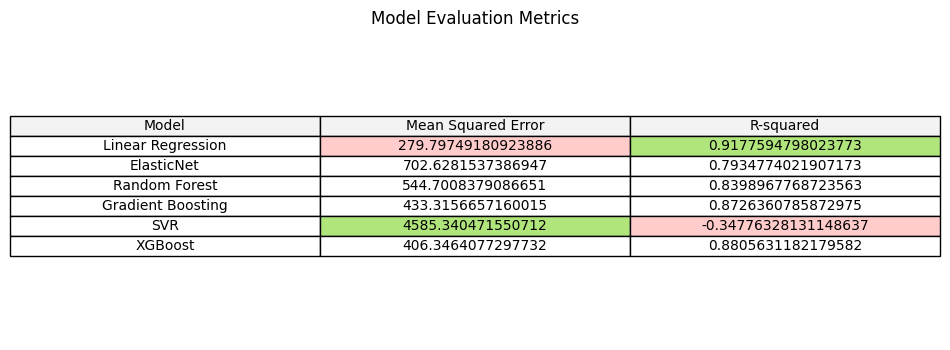

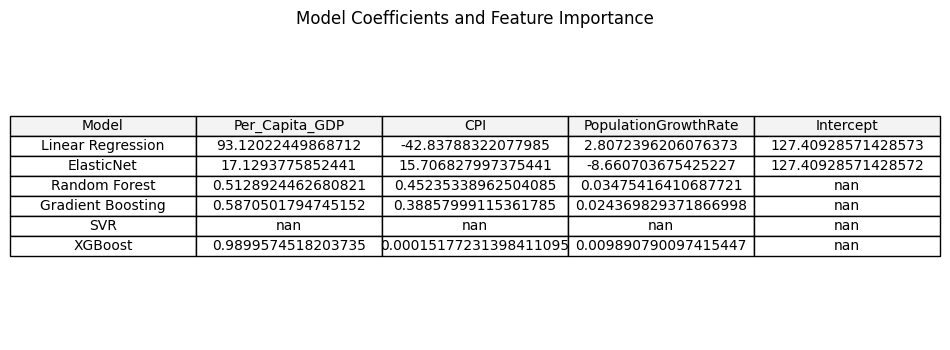

In [1]:
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'Mean Squared Error': [279.79749180923886, 702.6281537386947, 544.7008379086651, 433.3156657160015, 4585.340471550712, 406.3464077297732],
    'R-squared': [0.9177594798023773, 0.7934774021907173, 0.8398967768723563, 0.8726360785872975, -0.34776328131148637, 0.8805631182179582]
}

coefficients = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'Per_Capita_GDP': [93.12022449868712, 17.1293775852441, 0.5128924462680821, 0.5870501794745152, None, 0.9899574518203735],
    'CPI': [-42.83788322077985, 15.706827997375441, 0.45235338962504085, 0.38857999115361785, None, 0.00015177231398411095],
    'PopulationGrowthRate': [2.8072396206076373, -8.660703675425227, 0.03475416410687721, 0.024369829371866998, None, 0.009890790097415447],
    'Intercept': [127.40928571428573, 127.40928571428572, None, None, None, None]
}

# Convert dictionaries to DataFrames
df_metrics = pd.DataFrame(data)
df_coefficients = pd.DataFrame(coefficients)

# Plotting the metrics table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
metrics_table = ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, cellLoc='center', loc='center', colColours=['#f3f3f3']*len(df_metrics.columns))
metrics_table.auto_set_font_size(False)
metrics_table.set_fontsize(10)
metrics_table.scale(1.2, 1.2)

# Highlight min and max Mean Squared Error (MSE)
min_mse_index = np.argmin(df_metrics['Mean Squared Error'])
max_mse_index = np.argmax(df_metrics['Mean Squared Error'])

for i in range(len(df_metrics)):
    for j in range(len(df_metrics.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df_metrics.columns.get_loc('Mean Squared Error'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            metrics_table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df_metrics['R-squared'])
max_r2_index = np.argmax(df_metrics['R-squared'])

for i in range(len(df_metrics)):
    for j in range(len(df_metrics.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df_metrics.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            metrics_table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()

# Plotting the coefficients table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
coefficients_table = ax.table(cellText=df_coefficients.values, colLabels=df_coefficients.columns, cellLoc='center', loc='center', colColours=['#f3f3f3']*len(df_coefficients.columns))
coefficients_table.auto_set_font_size(False)
coefficients_table.set_fontsize(10)
coefficients_table.scale(1.2, 1.2)

plt.title('Model Coefficients and Feature Importance')
plt.show()
